In [1]:
import subprocess
import sys

# List of required packages
required_packages = [
    "numpy",
    "pandas",
    "matplotlib",
    "seaborn",
    "scikit-learn",
    "openpyxl",
    "imblearn",
    "statsmodels",
]

# Function to install packages using pip
def install_packages(packages):
    for package in packages:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# Install the required packages
install_packages(required_packages)

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
from imblearn.over_sampling import SMOTE
import warnings

## Loading the dataset into a dataframe

In [2]:
df = pd.read_excel('/Users/markuskronborgkvalvik/Library/Mobile Documents/com~apple~CloudDocs/Skole/CBS MSc/Speciale/Data/Dataset_vf.xlsx')

## Checking for null values 

In [3]:
print(df.isna().sum())

Date                         0
Ticker                       0
Q1                           0
Q2                           0
Q3                           0
                            ..
Target_Excess_SPX_Binary     0
Target_Alpha_SP500_Binary    0
Target_ACWI_3_Binary         0
Target_SPX_3_Binary          0
Target_Alpha_3_Binary        0
Length: 92, dtype: int64


## Identifying unique stocks in the dataset

In [4]:
unique_tickers = df['Ticker'].unique()
num_unique_tickers = len(unique_tickers)

print(f"Number of different ticker values: {num_unique_tickers}")
print("Unique ticker values:", unique_tickers)

Number of different ticker values: 243
Unique ticker values: ['NYSE:A' 'NYSE:ABT' 'NYSE:ADM' 'NYSE:AEE' 'NYSE:AES' 'NYSE:AN' 'NYSE:APD'
 'NYSE:ASH' 'NYSE:ATI' 'NYSE:AVY' 'NYSE:AZO' 'NYSE:BA' 'NYSE:BALL'
 'NYSE:BAX' 'NYSE:BBWI' 'NYSE:BBY' 'NYSE:BC' 'NYSE:BDX' 'NYSE:BIG'
 'NYSE:BMY' 'NYSE:BSX' 'NYSE:CAG' 'NYSE:CAH' 'NYSE:CAT' 'NYSE:CCL'
 'NYSE:CCU' 'NYSE:CI' 'NYSE:CIEN' 'NYSE:CL' 'NYSE:CLX' 'NYSE:CMI'
 'NYSE:CMS' 'NYSE:CNP' 'NYSE:COP' 'NYSE:COR' 'NYSE:CPB' 'NYSE:CVS'
 'NYSE:CVX' 'NYSE:D' 'NYSE:DD' 'NYSE:DDS' 'NYSE:DE' 'NYSE:DGX' 'NYSE:DHI'
 'NYSE:DHR' 'NYSE:DIS' 'NYSE:DOV' 'NYSE:DRI' 'NYSE:DTE' 'NYSE:DUK'
 'NYSE:DVN' 'NYSE:DXC' 'NYSE:ECL' 'NYSE:ED' 'NYSE:EFX' 'NYSE:EIX'
 'NYSE:ELV' 'NYSE:EMN' 'NYSE:EMR' 'NYSE:EOG' 'NYSE:EQR' 'NYSE:ETN'
 'NYSE:ETR' 'NYSE:F' 'NYSE:FCX' 'NYSE:FDX' 'NYSE:FE' 'NYSE:FLR' 'NYSE:GD'
 'NYSE:GE' 'NYSE:GIS' 'NYSE:GLW' 'NYSE:GPC' 'NYSE:GPS' 'NYSE:GWW'
 'NYSE:HAL' 'NYSE:HD' 'NYSE:HES' 'NYSE:HOG' 'NYSE:HPQ' 'NYSE:HRB'
 'NYSE:HSY' 'NYSE:HUM' 'NYSE:IBM' 'NYSE:IFF' 'NYSE

## Drooping na values

In [5]:
print(df.isna().sum())
df = df.dropna()

Date                         0
Ticker                       0
Q1                           0
Q2                           0
Q3                           0
                            ..
Target_Excess_SPX_Binary     0
Target_Alpha_SP500_Binary    0
Target_ACWI_3_Binary         0
Target_SPX_3_Binary          0
Target_Alpha_3_Binary        0
Length: 92, dtype: int64


## Datatype overview

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52488 entries, 0 to 52487
Data columns (total 92 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               52488 non-null  datetime64[ns]
 1   Ticker                             52488 non-null  object        
 2   Q1                                 52488 non-null  int64         
 3   Q2                                 52488 non-null  int64         
 4   Q3                                 52488 non-null  int64         
 5   Q4                                 52488 non-null  int64         
 6   Health_Care                        52488 non-null  int64         
 7   Consumer_Staples                   52488 non-null  int64         
 8   Utilities                          52488 non-null  int64         
 9   Consumer_Discretionary             52488 non-null  int64         
 10  Materials                         

## Creating copy of original dataset

In [7]:
df_original = df.copy()
df_original

,Date,Ticker,Q1,Q2,Q3,Q4,Health_Care,Consumer_Staples,Utilities,Consumer_Discretionary,...,Target_ACWI_3,Target_SPX_3,Target_Alpha_3,Target_Return_Binary,Target_Excess_ACWI_Binary,Target_Excess_SPX_Binary,Target_Alpha_SP500_Binary,Target_ACWI_3_Binary,Target_SPX_3_Binary,Target_Alpha_3_Binary
0,2006-01-01,NYSE:A,1,0,0,0,1,0,0,0,...,1,1,1,1,0,0,0,0,0,0
1,2006-02-01,NYSE:A,1,0,0,0,1,0,0,0,...,2,2,2,1,1,1,1,1,1,1
2,2006-03-01,NYSE:A,1,0,0,0,1,0,0,0,...,2,2,2,1,1,1,1,1,1,1
3,2006-04-01,NYSE:A,0,1,0,0,1,0,0,0,...,1,2,1,1,0,1,0,0,1,0
4,2006-05-01,NYSE:A,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52483,2023-08-01,NasdaqGS:XRX,0,0,1,0,0,0,0,0,...,0,0,0,0,1,1,1,0,0,0
52484,2023-09-01,NasdaqGS:XRX,0,0,1,0,0,0,0,0,...,0,0,0,1,1,1,1,0,0,0
52485,2023-10-01,NasdaqGS:XRX,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52486,2023-11-01,NasdaqGS:XRX,0,0,0,1,0,0,0,0,...,1,2,1,1,0,1,0,0,1,0


## Dropping all non-used features

In [25]:
df = df_original.copy()
target_variable = 'Target_Excess_ACWI_Binary'
#df = df.drop('Target_Return', axis=1)
df = df.drop('Ticker', axis=1)
df = df.drop('Communication_Services', axis=1)
df = df.drop('Q4', axis=1)
df = df.drop('Target_Excess_ACWI', axis=1)
df = df.drop('Target_Excess_SPX', axis=1)
df = df.drop('Target_Alpha_SP500', axis=1)
df = df.drop('Target_ACWI_3', axis=1)
df = df.drop('Target_SPX_3', axis=1)
df = df.drop('Target_Alpha_3', axis=1)
df = df.drop('Target_Return_Binary', axis=1)
#df = df.drop('Target_Excess_ACWI_Binary', axis=1)
df = df.drop('Target_Excess_SPX_Binary', axis=1)
df = df.drop('Target_Alpha_SP500_Binary', axis=1)
df = df.drop('Target_ACWI_3_Binary', axis=1)
df = df.drop('Target_SPX_3_Binary', axis=1)
df = df.drop('Target_Alpha_3_Binary', axis=1)

In [26]:
num_classes = df[target_variable].nunique()
num_classes

2

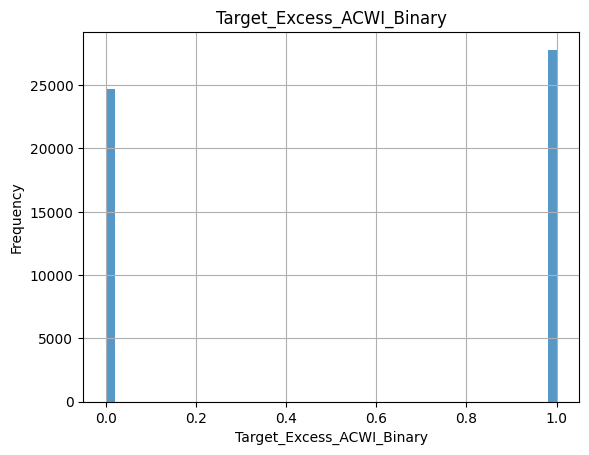

In [27]:
plt.hist(df[target_variable], bins=50, alpha=0.75)

plt.xlabel(target_variable)
plt.ylabel('Frequency')
plt.title(target_variable)

plt.grid(True)
plt.show()

## Function that creates a rolling sample split

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit
from sklearn.preprocessing import RobustScaler

def rolling_split(df, start_date, traning_date_delay_in_years, training_length, validation_length, test_length):
    """
    Split the dataframe into training, validation, and test sets based on specified dates.
    
    Parameters:
        df (DataFrame): The DataFrame containing the dataset with a "Date" column.
        start_date (str): The start date of the split in the format 'YYYY-MM-DD'.
        end_date (str): The end date of the split in the format 'YYYY-MM-DD'.
        training_length (int): The length of the training set in years.
        validation_length (int): The length of the validation set in years.
    
    Returns:
        tuple: A tuple containing the training, validation, and test sets.
    """

    # Set random seed for reproducibility
    np.random.seed(42) 
    
    # Convert the "Date" column to datetime format
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Convert the start and end dates to datetime format
    start_date = pd.to_datetime(start_date)
    start_training = start_date + pd.DateOffset(years=traning_date_delay_in_years)
    
    # Calculate the end date of the training set
    end_training = start_training + pd.DateOffset(years=training_length)
    
    # Calculate the end date of the validation set
    end_validation = end_training + pd.DateOffset(years=validation_length)
    
    # Filter the DataFrame based on the specified dates
    training_rows = (df['Date'] >= start_training) & (df['Date'] < end_training)
    validation_rows = (df['Date'] >= end_training) & (df['Date'] < end_validation)
    test_rows = (df['Date'] >= end_validation) & (df['Date'] <= end_validation + pd.DateOffset(years=test_length))
    
    # Filter the DataFrame based on the rows for each set
    X_train = df.loc[training_rows].drop(['Date', target_variable , 'Target_Return'], axis=1)
    X_val = df.loc[validation_rows].drop(['Date', target_variable, 'Target_Return'], axis=1)
    X_test = df.loc[test_rows].drop(['Date', target_variable, 'Target_Return'], axis=1)
    y_train = df.loc[training_rows, target_variable]
    y_val = df.loc[validation_rows, target_variable]
    y_test = df.loc[test_rows, target_variable]

    binary_columns = [
    "Q1", "Q2", "Q3", "Health_Care", "Consumer_Staples", "Utilities",
    "Consumer_Discretionary", "Materials", "Industrials", "Information_Technology",
    "Energy", "Real_Estate", "EV_Negative"
    ]
    ############### Standard scaling ###################
    # Initialize the RobustScaler
    scaler = RobustScaler()

    # Determine which columns are not binary
    non_binary_columns = [col for col in X_train.columns if col not in binary_columns]

    # Fit and transform the non-binary training data columns
    X_train_scaled = scaler.fit_transform(X_train[non_binary_columns])
    X_train[non_binary_columns] = X_train_scaled

    # Transform the validation data using the same scaler
    X_val_scaled = scaler.transform(X_val[non_binary_columns])
    X_val[non_binary_columns] = X_val_scaled

    # Transform the test data
    X_test_scaled = scaler.transform(X_test[non_binary_columns])
    X_test[non_binary_columns] = X_test_scaled

    ################ Oversampling with SMOTE #################
    #smote = SMOTE()
    #X_train, y_train = smote.fit_resample(X_train, y_train)
    
    ################ Undersampling to secure balance #################
    # class_1_ratio = len(y_train[y_train == 1]) / len(y_train[y_train == 0])

    # # Ensure class_1_ratio is not greater than 1
    # if class_1_ratio > 1:
    #     # Downsample the majority class
    #     X_train_resampled = pd.concat([
    #         X_train[y_train == 1],
    #         X_train[y_train == 0].sample(frac=class_1_ratio, random_state=42, replace=True)
    #     ], ignore_index=True)
    #     y_train_resampled = pd.concat([
    #         y_train[y_train == 1],
    #         y_train[y_train == 0].sample(frac=class_1_ratio, random_state=42, replace=True)
    #     ], ignore_index=True)

    #     # Assign the resampled data back to X_train and y_train
    #     X_train = X_train_resampled
    #     y_train = y_train_resampled
    
    return X_train, X_val, X_test, y_train, y_val, y_test

## Defining relevant variables and training, validation and test length

In [29]:
# Usage example
start_date = '2005-12-31'  # Start date of the split
#end_date = '2023-11-30'  # End date of the split
training_length = 5  # Number of years for the training set
validation_length = 1  # Number of years for the validation set
test_length = 1
df_sorted = df.sort_values(by='Date')
base_test_year = 2012
base_training_year = 2006

# Filter the original DataFrame to include only dates from 2018-2023
df_test_file = df_original.copy()
df_validation_file = df_original.copy()
start_test = '2016-01-01'
end_test = '2023-12-01'
df_test_file = df_test_file[(df_test_file['Date'] >= start_test) & (df['Date'] <= end_test)]




## Executing the model with gridsearch for each training window

In [30]:
from sklearn.metrics import precision_score, f1_score, make_scorer
from sklearn.metrics import precision_recall_curve, auc
from sklearn.tree import DecisionTreeClassifier
from datetime import datetime
from multiprocessing import Process, Manager
import warnings
df_validation_file = df_original.copy()



start_time = datetime.now()

expected_labels = np.arange(num_classes)  # Labels are 0, 1, 2, 3

# Initialize cumulative confusion matrices with zeros
cumulative_train_cm = np.zeros((num_classes, num_classes), dtype=int)
cumulative_test_cm = np.zeros((num_classes, num_classes), dtype=int)
cumulative_val_cm = np.zeros((num_classes, num_classes), dtype=int)

# Initialize lists to store all true labels and predictions
all_y_train_true = []
all_y_train_pred = []
all_y_train_prob = []
all_y_val_true = []
all_y_val_pred = []
all_y_val_prob = []
all_y_test_true = []
all_y_test_pred = []
all_y_test_prob = []

# Determine the highest class label dynamically as this is by nature the outperformer no matter if we use binary or multiclass classification
max_label = df_original[target_variable].max()

# Define a custom scoring function focusing only on the highest class
def custom_f1_scorer(y_true, y_pred):
    # Calculate F1 scores for each class
    f1_scores = f1_score(y_true, y_pred, labels=[max_label], average=None)
    # Return the F1 score for the highest class label
    return f1_scores[0]  # Since labels=[max_label] f1_scores will have only one element

# Create a scorer using make_scorer
my_custom_scorer = make_scorer(custom_f1_scorer)


param_grid = {
    'ccp_alpha': [0.01, 0.001, 0.0001],  
    'criterion': ['gini', 'entropy'],
    'max_depth': range(19, 25), #Best:     'max_depth': range(19, 25),
    'min_samples_split': [12, 15, 18],
    'min_samples_leaf': [6, 8, 10],
    'max_features': [None],
}

# Dictionary to keep track of scores for all parameter combinations across the last 5 iterations
score_history = {}

# Define the average_best_params function
def average_best_params(score_history):
    avg_scores = {params: sum(scores) / len(scores) for params, scores in score_history.items() if len(scores) >= 5}
    if not avg_scores:
        return None
    best_params_tuple = max(avg_scores, key=avg_scores.get)
    return best_params_tuple

for training_date_delay_in_years in range(18-training_length-validation_length-test_length+1):
    X_train, X_val, X_test, y_train, y_val, y_test = rolling_split(df_sorted, start_date, training_date_delay_in_years, training_length, validation_length, test_length)
    print(training_date_delay_in_years +1)
    
    warnings.filterwarnings("ignore")

    # Combine training and validation data
    X_combined = pd.concat([X_train, X_val], axis=0)
    y_combined = pd.concat([y_train, y_val], axis=0)
    
    # Create the PredefinedSplit
    # -1 for training data, 0 for validation data
    test_fold = np.concatenate([
        np.full(X_train.shape[0], -1, dtype=int),  # Mark training data
        np.zeros(X_val.shape[0], dtype=int)        # Mark validation data
    ])
    ps = PredefinedSplit(test_fold)

    ########################## GridSearch ################################

    # Initialize GridSearchCV with the predefined split
    grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=ps, scoring='f1_weighted', refit=True, n_jobs=-1)

    # Fit GridSearchCV on the combined dataset
    grid_search.fit(X_combined, y_combined)

    results_df = pd.DataFrame(grid_search.cv_results_)
    # Update score history for each parameter set
    for index, row in results_df.iterrows():
        params_tuple = tuple(row['params'].items())
        if params_tuple not in score_history:
            score_history[params_tuple] = []
        score_history[params_tuple].append(row['mean_test_score'])

        # Maintain only the last 5 scores for each parameter set
        if len(score_history[params_tuple]) > 5:
            score_history[params_tuple].pop(0)
    
    # Before attempting to access keys in score_history, check if it is non-empty
    if score_history and len(score_history[list(score_history.keys())[0]]) >= 5:
        best_params_tuple = average_best_params(score_history)
        # Display the results
        print("Grid Search Results:")
        print(results_df[['params', 'mean_test_score']])
        print(len(X_combined))

        # Get the best parameters from the grid search
        best_params = grid_search.best_params_
        print("\nBest Hyperparameters:", best_params)
        
        best_params = dict(best_params_tuple)
        print("Best Parameters based on highest average mean_test_score from the last 5 years:", best_params)
        best_model = DecisionTreeClassifier(**best_params, random_state=42)
        best_model.fit(X_train, y_train)
    else:
        print("Accumulating data, not yet enough history for averaging.")
        best_params = grid_search.best_params_
        best_model = DecisionTreeClassifier(**best_params, random_state=42)
        best_model.fit(X_train, y_train)        

    # Display the results
    print("Grid Search Results:")
    print(results_df[['params', 'mean_test_score']])
    print(len(X_combined))

    # Get the best parameters from the grid search
    best_params = grid_search.best_params_
    print("\nBest Hyperparameters:", best_params)

    ################################## Evaluating Training set ########################
    y_train_pred = best_model.predict(X_train)
    y_train_prob = best_model.predict_proba(X_train)[:, max_label]
    y_val_pred = best_model.predict(X_val)
    y_val_prob = best_model.predict_proba(X_val)[:, max_label]
    y_val_prob = np.array(y_val_prob, dtype=np.float64)
    df_validation_file.loc[X_val.index, 'Predicted'] = y_val_pred
    df_validation_file.loc[X_val.index, 'Probabilities'] = y_val_prob

    ########### Training #############            
    train_cm = confusion_matrix(y_train, y_train_pred, labels=expected_labels)
    cumulative_train_cm += train_cm
    all_y_train_true.extend(y_train)
    all_y_train_pred.extend(y_train_pred)
    all_y_train_prob.extend(y_train_prob)
    print(f"Training Years: {base_training_year + training_date_delay_in_years}-{base_training_year + training_date_delay_in_years + training_length} with Averaged Parameters:")
    print(classification_report(y_train, y_train_pred))
    print("Confusion Matrix on training Set:")
    print(confusion_matrix(y_train, y_train_pred))

    ########### Validation ############            
    val_cm = confusion_matrix(y_val, y_val_pred, labels=expected_labels)
    cumulative_val_cm += val_cm
    all_y_val_true.extend(y_val)
    all_y_val_pred.extend(y_val_pred)
    all_y_val_prob.extend(y_val_prob)
    print(f"Validation Report for Window {training_date_delay_in_years + 1} with Averaged Parameters:")    
    print(classification_report(y_val, y_val_pred))
    print("Confusion Matrix on Validation Set:")
    print(confusion_matrix(y_val, y_val_pred))

    # Before attempting to access keys in score_history, check if it is non-empty
    if score_history and any(len(scores) >= 5 for scores in score_history.values()):
        best_params_tuple = average_best_params(score_history)
        if best_params_tuple:
            average_params = dict(best_params_tuple)
            print("Averaged Parameters for Window", training_date_delay_in_years + 1, ":", average_params)

            model = DecisionTreeClassifier(**average_params, random_state=42)
            model.fit(X_combined, y_combined)

            y_test_pred = model.predict(X_test)
            y_test_prob = model.predict_proba(X_test)[:, max_label]
            y_test_prob = np.array(y_test_prob, dtype=np.float64)

            ############# Test ###############            
            print(f"\nTest Year: {base_test_year + training_date_delay_in_years}")
            test_cm = confusion_matrix(y_test, y_test_pred, labels=expected_labels)
            cumulative_test_cm += test_cm
            all_y_test_true.extend(y_test)
            all_y_test_pred.extend(y_test_pred)
            all_y_test_prob.extend(y_test_prob)
            print("Classification Report on Test Set:")
            print(classification_report(y_test, y_test_pred))
            print("Confusion Matrix on Test Set:")
            print(confusion_matrix(y_test, y_test_pred))
            
            
            df_test_file.loc[X_test.index, 'Predicted'] = y_test_pred
            df_test_file.loc[X_test.index, 'Probabilities'] = y_test_prob
        else:
            print("Not enough data to compute averaged parameters for this window.")
    else:
        print("Accumulating data, not yet enough history for averaging.")

    end_time = datetime.now()
    
    # Calculate the total duration post this most recent iteration
    duration_one_iteration = end_time - start_time

    # Format the timedelta to exclude milliseconds and print it
    formatted_duration = str(duration_one_iteration).split('.')[0]  
    print("Total Duration:", formatted_duration)

    #average_params = average_best_params(best_params_history)
    #print("Average Best Parameters across all windows:", average_params)

start_val = '2015-01-01'
end_val = '2022-12-01'
df_validation_file = df_validation_file[(df_validation_file['Date'] >= start_val) & (df['Date'] <= end_val)]

1
Accumulating data, not yet enough history for averaging.
Grid Search Results:
                                                params  mean_test_score
0    {'ccp_alpha': 0.01, 'criterion': 'gini', 'max_...         0.417101
1    {'ccp_alpha': 0.01, 'criterion': 'gini', 'max_...         0.417101
2    {'ccp_alpha': 0.01, 'criterion': 'gini', 'max_...         0.417101
3    {'ccp_alpha': 0.01, 'criterion': 'gini', 'max_...         0.417101
4    {'ccp_alpha': 0.01, 'criterion': 'gini', 'max_...         0.417101
5    {'ccp_alpha': 0.01, 'criterion': 'gini', 'max_...         0.417101
6    {'ccp_alpha': 0.01, 'criterion': 'gini', 'max_...         0.417101
7    {'ccp_alpha': 0.01, 'criterion': 'gini', 'max_...         0.417101
8    {'ccp_alpha': 0.01, 'criterion': 'gini', 'max_...         0.417101
9    {'ccp_alpha': 0.01, 'criterion': 'gini', 'max_...         0.417101
10   {'ccp_alpha': 0.01, 'criterion': 'gini', 'max_...         0.417101
11   {'ccp_alpha': 0.01, 'criterion': 'gini', 'max_...  

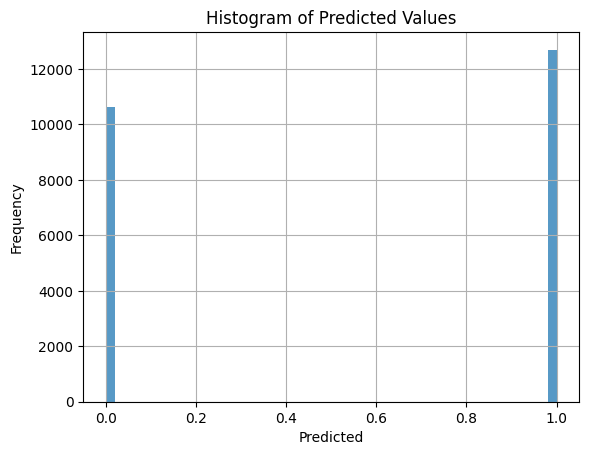

In [31]:
plt.hist(df_test_file['Predicted'], bins=50, alpha=0.75)

plt.xlabel('Predicted')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Values')

plt.grid(True)
plt.show()

### Deploying confusion matrix summarised for all training, validation and test windows for gridsearch parameters

In [32]:
print("Summary Classification Report for Training Set:")
print(classification_report(all_y_train_true, all_y_train_pred, digits=4))
print("Collected Training Confusion Matrix:")
print(cumulative_train_cm)

print("Summary Classification Report for Validation Set:")
print(classification_report(all_y_val_true, all_y_val_pred, digits=4))
print("Collected Validation Confusion Matrix:")
print(cumulative_train_cm)

print("\nSummary Classification Report for Test Set:")
print(classification_report(all_y_test_true, all_y_test_pred, digits=4))
print("\nCollected Test Confusion Matrix:")
print(cumulative_test_cm)

Summary Classification Report for Training Set:
              precision    recall  f1-score   support

           0     0.7554    0.7369    0.7460     80576
           1     0.7800    0.7963    0.7880     94384

    accuracy                         0.7689    174960
   macro avg     0.7677    0.7666    0.7670    174960
weighted avg     0.7687    0.7689    0.7687    174960

Collected Training Confusion Matrix:
[[59375 21201]
 [19227 75157]]
Summary Classification Report for Validation Set:
              precision    recall  f1-score   support

           0     0.4774    0.4568    0.4669     16081
           1     0.5544    0.5747    0.5644     18911

    accuracy                         0.5205     34992
   macro avg     0.5159    0.5158    0.5156     34992
weighted avg     0.5190    0.5205    0.5196     34992

Collected Validation Confusion Matrix:
[[59375 21201]
 [19227 75157]]

Summary Classification Report for Test Set:
              precision    recall  f1-score   support

          

In [33]:
df_test_file['Probabilities'].nunique()

257

In [34]:
# Extract feature names directly from X_train
feature_names = X_train.columns.tolist()

# Extract feature importances from the model
importances = model.feature_importances_

# Create a DataFrame to display feature names and their corresponding importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print the DataFrame to see the features sorted by importance
pd.set_option('display.max_rows', 100)
feature_importance_df

,Feature,Importance
28,1_month_return,0.037897
29,3_month_return,0.037586
30,52w_High_Diff,0.035196
32,Volatility,0.033349
31,52w_Low_Diff,0.032463
73,Return_on_Invested_Capital,0.027211
47,Dividend_Yield,0.026390
33,Beta_5y,0.026368
46,FCF_LTM_Unlevered_Yield,0.025586
68,CurrentLiab_to_NIBD,0.023997


In [35]:
# Ensure the 'Date' column is in the proper datetime format
df_test_file['Date'] = pd.to_datetime(df_test_file['Date'])

# Rank the stocks within each date based on 'Probabilities'
df_test_file['Rank'] = df_test_file.groupby('Date')['Probabilities'].rank(method='dense', ascending=False).astype(float)

# Calculate the total number of stocks per date for the percentage calculation
total_stocks_per_date = df_test_file.groupby('Date')['Date'].transform('count').astype(float)

# Calculate the Rank % column and ensure it is a float
df_test_file['Rank %'] = ((df_test_file['Rank'] / total_stocks_per_date) * 100).astype(float)
df_test_file['Rank %'] = 100 - df_test_file['Rank %'] + 1

df_test_file['Rank %']

# Calculate the average rank
average_rank = df_test_file['Rank'].mean()

# Print debugging information and the average rank
print("Average Rank:", average_rank)

Average Rank: 11.675325788751715


### Saving predictions in an excel file for gridsearch parameters

In [36]:
import os

# Construct the path to the home directory
home_dir = os.path.expanduser('/Users/markuskronborgkvalvik/Library/Mobile Documents/com~apple~CloudDocs/Skole/CBS MSc/Speciale/Results/Results/DT')  # '' refers to the home directory
file_path = os.path.join(home_dir, f"DT_{target_variable}_results.xlsx")

# Try to save the file to the home directory
df_test_file.to_excel(file_path, index=True)

## ROC-curve and AUC

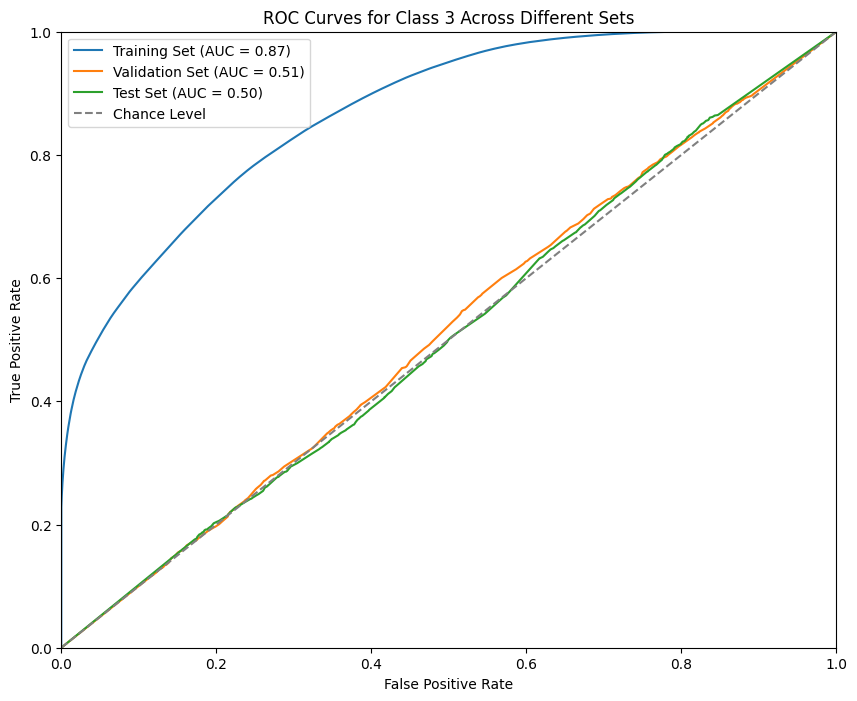

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np

def plot_roc_curves(labels, all_y_probabilities, all_y_true):
    plt.figure(figsize=(10, 8))

    for label, y_prob, y_true in zip(labels, all_y_probabilities, all_y_true):
        y_true = np.array(y_true)
        y_binary = (y_true == max_label).astype(int)  # Binarize y for class 3 specifically

        # Calculate ROC curve and ROC AUC for class 3
        fpr, tpr, _ = roc_curve(y_binary, y_prob)
        roc_auc = roc_auc_score(y_binary, y_prob)

        # Plot the ROC curve
        plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

    # Plot chance level (diagonal line for visual distinction)
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Chance Level')

    plt.title('ROC Curves for Class 3 Across Different Sets')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.xlim([0, 1])  # Set x-axis limit from 0 to 1
    plt.ylim([0, 1])  # Set y-axis limit from 0 to 1
    plt.legend(loc='best')
    plt.show()

# Example usage (assuming you have these variables defined appropriately)
plot_roc_curves(
    ["Training Set", "Validation Set", "Test Set"],
    [all_y_train_prob, all_y_val_prob, all_y_test_prob],
    [all_y_train_true, all_y_val_true, all_y_test_true]
)

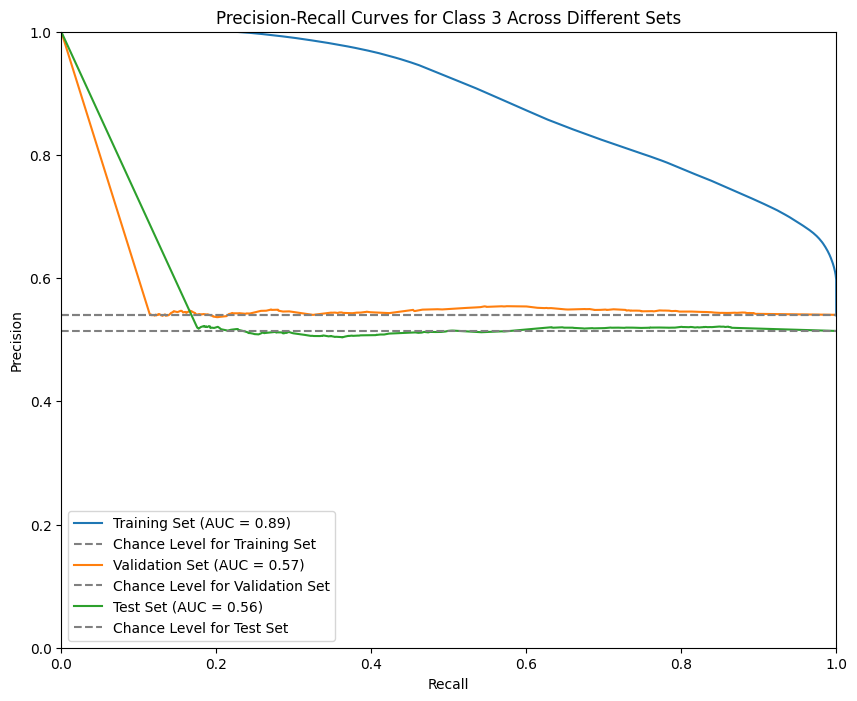

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

def plot_precision_recall_curves(labels, all_y_probabilities, all_y_true):
    plt.figure(figsize=(10, 8))

    for label, y_prob, y_true in zip(labels, all_y_probabilities, all_y_true):

        y_true = np.array(y_true)

        # Binarize y for class 3 specifically
        y_binary = (y_true == max_label).astype(int)
        
        # Calculate precision-recall curve and AUC for class 3
        precision, recall, _ = precision_recall_curve(y_binary, y_prob)
        pr_auc = auc(recall, precision)
        

        # Calculate chance level for class 3
        no_skill = len(y_true[y_true == max_label]) / len(y_true) if len(y_true) > 0 else 0

        # Plot the precision-recall curve
        plt.plot(recall, precision, label=f'{label} (AUC = {pr_auc:.2f})')

        # Plot chance level (dotted line for visual distinction)
        plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='gray', label=f'Chance Level for {label}')

    plt.title('Precision-Recall Curves for Class 3 Across Different Sets')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.xlim([0, 1])  # Set x-axis limit from 0 to 1
    plt.ylim([0, 1])  # Set y-axis limit from 0 to 1
    plt.legend(loc='best')
    plt.show()

plot_precision_recall_curves(
    ["Training Set", "Validation Set", "Test Set"],
    [all_y_train_prob, all_y_val_prob, all_y_test_prob],
    [all_y_train_true, all_y_val_true, all_y_test_true]
)

## Trading Performance

In [39]:
def calculate_metrics(df_results):
    # Group by 'Date' and calculate the mean 'Strategy_Return' and 'Rf' for each group
    average_strategy_return_df = df_results.groupby('Date').agg({
        'Strategy_Return': 'mean',
        'Rf': 'mean'
    }).reset_index()

    # Rename columns for clarity
    average_strategy_return_df.columns = ['Date', 'Strategy_Return', 'Rf']

    # Handle potential NA values in 'Strategy_Return'
    average_strategy_return_df['Strategy_Return'].fillna(0, inplace=True)

    # Calculate the cumulative return of the strategy
    average_strategy_return_df['Cumulative_Return'] = (1 + average_strategy_return_df['Strategy_Return']).cumprod() - 1

    # Calculate excess return by subtracting the risk-free rate (annualized by dividing by 12)
    average_strategy_return_df['Excess_return'] = average_strategy_return_df['Strategy_Return'] - (average_strategy_return_df['Rf'] / 12)

    # Calculate the annualized excess return and standard deviation
    annualized_excess_return = average_strategy_return_df['Excess_return'].mean() * 12 * 100
    annualized_volatility = average_strategy_return_df['Excess_return'].std() * np.sqrt(12) * 100

    # Final cumulative return after the last date
    final_cumulative_return = average_strategy_return_df['Cumulative_Return'].iloc[-1] * 100

    # Calculate the Sharpe Ratio
    sharpe_ratio = annualized_excess_return / annualized_volatility if annualized_volatility != 0 else 0
    
    return annualized_excess_return, annualized_volatility, final_cumulative_return, sharpe_ratio

# Create a new column 'Strategy_Return' based on the condition for the Long-only strategy
df_results_long_only = df_test_file.copy()
df_results_long_only.loc[:, 'Strategy_Return'] = np.where(df_results_long_only['Predicted'] == max_label, df_results_long_only['Target_Return'], np.nan)

annualized_excess_return_long_only, annualized_volatility_long_only, final_cumulative_return_long_only, sharpe_ratio_long_only = calculate_metrics(df_results_long_only)

print("\033[1mLong only strategy:\033[0m")
print(f"Annualized Average Return: {annualized_excess_return_long_only:.2f}%")
print(f"Annualized Standard Deviation: {annualized_volatility_long_only:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio_long_only:.2f}")
print(f"Final Cumulative Return: {final_cumulative_return_long_only:.2f}%")

# Create a new column 'Strategy_Return' based on the condition for the Long-short strategy
df_results_long_short = df_test_file.copy()
df_results_long_short.loc[:, 'Strategy_Return'] = np.where(df_results_long_short['Predicted'] == max_label, df_results_long_short['Target_Return'], (-1 * df_results_long_short['Target_Return']))

annualized_excess_return_long_short, annualized_volatility_long_short, final_cumulative_return_long_short, sharpe_ratio_long_short = calculate_metrics(df_results_long_short)

print("")
print("\033[1mLong-short strategy:\033[0m")
print(f"Annualized Average Return: {annualized_excess_return_long_short:.2f}%")
print(f"Annualized Standard Deviation: {annualized_volatility_long_short:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio_long_short:.2f}")
print(f"Final Cumulative Return: {final_cumulative_return_long_short:.2f}%")



Long only strategy:
Annualized Average Return: 13.72%
Annualized Standard Deviation: 18.90%
Sharpe Ratio: 0.73
Final Cumulative Return: 191.94%

Long-short strategy:
Annualized Average Return: 2.26%
Annualized Standard Deviation: 7.54%
Sharpe Ratio: 0.30
Final Cumulative Return: 32.12%


## Threshold overview

In [40]:
import numpy as np
import pandas as pd
from sklearn.metrics import precision_recall_curve
from scipy.interpolate import interp1d

threshold_validation = df_validation_file.copy()

def combined_metrics_analysis(probabilities, true_labels, df, decimal_places=2):
    import warnings
    warnings.filterwarnings("ignore")
    results = []
    true_labels = np.array(true_labels)  # Ensure true_labels is a NumPy array
    y_binary = (true_labels == max_label).astype(int)  # Convert true labels for the highest label making the code generic for binary and multiclass variables
    
    precision, recall, thresholds = precision_recall_curve(y_binary, probabilities)
    precision_interp = interp1d(thresholds, precision[:-1], bounds_error=False, fill_value=(precision[0], precision[-1]))
    recall_interp = interp1d(thresholds, recall[:-1], bounds_error=False, fill_value=(recall[0], recall[-1]))

    threshold_steps = np.arange(0.0, 0.9, 0.001)  # Adjust range and steps as needed
    
    for threshold in threshold_steps:
        prec = precision_interp(threshold)
        rec = recall_interp(threshold)
        
        # Ensure prec and rec are scalars for rounding
        prec = prec.item() if isinstance(prec, np.ndarray) and prec.size == 1 else prec
        rec = rec.item() if isinstance(rec, np.ndarray) and rec.size == 1 else rec

        f1_score = 2 * prec * rec / (prec + rec) if (prec + rec) > 0 else 0
        
        df.loc[:, 'Predicted'] = df['Probabilities'].apply(lambda x: 1 if x >= threshold else np.nan)
        df.loc[:, 'Actual_return'] = df['Predicted'] * df['Target_Return']

        count_above_threshold = df['Predicted'].sum()

        grouped_data = df.groupby('Date').agg({
            'Actual_return': 'mean',
            'Rf': 'mean'
        }).reset_index()
        
        grouped_data['Actual_return'].fillna(0, inplace=True)
        
        grouped_data['Cumulative_Return'] = (1 + grouped_data['Actual_return']).cumprod() - 1
        grouped_data['Excess_return'] = grouped_data['Actual_return'] - (grouped_data['Rf']/12)

        annualized_excess_return = grouped_data['Excess_return'].mean() * 12 * 100
        annualized_volatility = grouped_data['Excess_return'].std() * np.sqrt(12) * 100
        final_cumulative_return = grouped_data['Cumulative_Return'].iloc[-1] * 100

        sharpe_ratio = annualized_excess_return / annualized_volatility if annualized_volatility != 0 else 0

        results.append({
            'Threshold': f"{threshold:.{decimal_places}f}",
            'Precision': f"{prec:.{decimal_places}f}",
            'Recall': f"{rec:.{decimal_places}f}",
            'F1-Score': f"{f1_score:.{decimal_places}f}",
            'Count_Above_Threshold': int(count_above_threshold),  # Ensure this is integer
            'Annualized_Return (%)': f"{annualized_excess_return:.{decimal_places}f}%",
            'Annualized_Volatility (%)': f"{annualized_volatility:.{decimal_places}f}%",
            'Sharpe_Ratio': f"{sharpe_ratio:.{decimal_places}f}",
            'Final_Cumulative_Return (%)': f"{final_cumulative_return:.{decimal_places}f}"
        })


        df.drop(columns=['Predicted', 'Actual_return'], inplace=True)

    return pd.DataFrame(results)

# Example usage assuming all necessary variables are defined and formatted correctly:
val_threshold = combined_metrics_analysis(all_y_val_prob, all_y_val_true, threshold_validation, decimal_places=3)

# Convert Sharpe Ratio and F1-Score to numeric types from string if they're stored as strings
val_threshold['Sharpe_Ratio'] = val_threshold['Sharpe_Ratio'].astype(float)
val_threshold['F1-Score'] = val_threshold['F1-Score'].astype(float)

# Find the threshold corresponding to the maximum average score
best_threshold_row = val_threshold.loc[val_threshold['F1-Score'].idxmax()]
best_threshold = best_threshold_row['Threshold']
sharpe_ratio = best_threshold_row['Sharpe_Ratio']

print(f"Best Threshold: {best_threshold} with maximum average of Sharpe Ratio: {sharpe_ratio}")

Best Threshold: 0.000 with maximum average of Sharpe Ratio: 0.648


In [41]:
import numpy as np
import pandas as pd
from sklearn.metrics import precision_recall_curve
from scipy.interpolate import interp1d

sharpe_ratios = df_test_file.copy()

def combined_metrics_analysis(probabilities, true_labels, df, decimal_places=2):
    import warnings
    warnings.filterwarnings("ignore")
    results = []
    true_labels = np.array(true_labels)  # Ensure true_labels is a NumPy array
    y_binary = (true_labels == max_label).astype(int)  # Convert true labels for the highest label making the code generic for binary and multiclass variables
    
    precision, recall, thresholds = precision_recall_curve(y_binary, probabilities)
    precision_interp = interp1d(thresholds, precision[:-1], bounds_error=False, fill_value=(precision[0], precision[-1]))
    recall_interp = interp1d(thresholds, recall[:-1], bounds_error=False, fill_value=(recall[0], recall[-1]))

    threshold_steps = np.arange(0.0, 0.9, 0.001)  # Adjust range and steps as needed
    
    for threshold in threshold_steps:
        prec = precision_interp(threshold)
        rec = recall_interp(threshold)
        
        # Ensure prec and rec are scalars for rounding
        prec = prec.item() if isinstance(prec, np.ndarray) and prec.size == 1 else prec
        rec = rec.item() if isinstance(rec, np.ndarray) and rec.size == 1 else rec

        f1_score = 2 * prec * rec / (prec + rec) if (prec + rec) > 0 else 0
        
        df.loc[:, 'Predicted'] = df['Probabilities'].apply(lambda x: 1 if x >= threshold else np.nan)
        df.loc[:, 'Actual_return'] = df['Predicted'] * df['Target_Return']

        count_above_threshold = df['Predicted'].sum()

        grouped_data = df.groupby('Date').agg({
            'Actual_return': 'mean',
            'Rf': 'mean'
        }).reset_index()
        
        grouped_data['Actual_return'].fillna(0, inplace=True)
        
        grouped_data['Cumulative_Return'] = (1 + grouped_data['Actual_return']).cumprod() - 1
        grouped_data['Excess_return'] = grouped_data['Actual_return'] - (grouped_data['Rf']/12)

        annualized_excess_return = grouped_data['Excess_return'].mean() * 12 * 100
        annualized_volatility = grouped_data['Excess_return'].std() * np.sqrt(12) * 100
        final_cumulative_return = grouped_data['Cumulative_Return'].iloc[-1] * 100

        sharpe_ratio = annualized_excess_return / annualized_volatility if annualized_volatility != 0 else 0

        results.append({
            'Threshold': f"{threshold:.{decimal_places}f}",
            'Precision': f"{prec:.{decimal_places}f}",
            'Recall': f"{rec:.{decimal_places}f}",
            'F1-Score': f"{f1_score:.{decimal_places}f}",
            'Count_Above_Threshold': int(count_above_threshold),  # Ensure this is integer
            'Annualized_Return (%)': f"{annualized_excess_return:.{decimal_places}f}%",
            'Annualized_Volatility (%)': f"{annualized_volatility:.{decimal_places}f}%",
            'Sharpe_Ratio': f"{sharpe_ratio:.{decimal_places}f}",
            'Final_Cumulative_Return (%)': f"{final_cumulative_return:.{decimal_places}f}%"
        })


        df.drop(columns=['Predicted', 'Actual_return'], inplace=True)

    return pd.DataFrame(results)

# Example usage assuming all necessary variables are defined and formatted correctly:
combined_results = combined_metrics_analysis(all_y_test_prob, all_y_test_true, sharpe_ratios, decimal_places=3)

pd.set_option('display.max_rows', 1000)
# Assuming 'best_threshold' contains the value of the threshold with the highest average score
best_threshold_sharpe_ratio = combined_results.loc[combined_results['Threshold'] == best_threshold, 'Sharpe_Ratio'].values[0]
print(f"Sharpe Ratio at best validation threshold ({best_threshold}): {best_threshold_sharpe_ratio}")
combined_results




Sharpe Ratio at best validation threshold (0.000): 0.702


,Threshold,Precision,Recall,F1-Score,Count_Above_Threshold,Annualized_Return (%),Annualized_Volatility (%),Sharpe_Ratio,Final_Cumulative_Return (%)
0,0.000,0.514,1.000,0.679,23328,13.290%,18.925%,0.702,181.625%
1,0.001,0.514,0.994,0.678,19983,14.068%,18.920%,0.744,199.980%
2,0.002,0.515,0.988,0.677,19983,14.068%,18.920%,0.744,199.980%
3,0.003,0.515,0.982,0.676,19983,14.068%,18.920%,0.744,199.980%
4,0.004,0.515,0.976,0.674,19983,14.068%,18.920%,0.744,199.980%
5,0.005,0.515,0.970,0.673,19983,14.068%,18.920%,0.744,199.980%
6,0.006,0.516,0.964,0.672,19983,14.068%,18.920%,0.744,199.980%
7,0.007,0.516,0.958,0.671,19983,14.068%,18.920%,0.744,199.980%
8,0.008,0.516,0.953,0.669,19983,14.068%,18.920%,0.744,199.980%
9,0.009,0.516,0.947,0.668,19983,14.068%,18.920%,0.744,199.980%
